<a href="https://colab.research.google.com/github/wmangoni/wmangoni.github.io/blob/main/portfolio_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o CSV
df = pd.read_excel('executionrecords.xlsx')

print(df.columns)

Index(['accumulation.day', 'accumulation.month', 'accumulation.monthWeek',
       'accumulation.reserve', 'accumulation.total', 'accumulation.year',
       'bureau.adresses.0', 'bureau.birthDate', 'bureau.bureauSearchedAt',
       'bureau.cascadeProvidersOrder.0',
       ...
       'executionRuleSet.1.workflowPreset.limits.year',
       'executionRuleSet.1.workflowPreset.name',
       'executionRuleSet.1.workflowPreset.rules.PEPMonitoring.enabled',
       'executionRuleSet.1.workflowPreset.rules.restrictiveListsMonitoring.enabled',
       'executionRuleSet.1.workflowPreset.updatedAt',
       'executionRuleSet.1.workflowPreset.version',
       'executionRuleSet.1.workflowRunStatus',
       'bureauDetailed.restrictiveListSource',
       'bureauDetailed.restrictiveListType',
       'executionRuleSet.1.rules.1.disclaimer'],
      dtype='object', length=115)


# Converter colunas de datas para o formato datetime, se necessário

In [37]:
df['createdAt'] = pd.to_datetime(df['transaction.referenceDate'])
df['transaction.referenceDate'] = pd.to_datetime(df['transaction.referenceDate'])

# Análise 1: Regressão Linear
## Exemplo: Tempo de execução vs Valor da transação

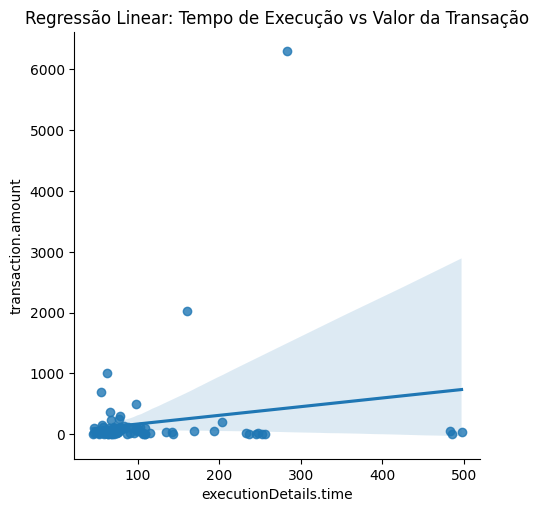

In [22]:
sns.lmplot(x='executionDetails.time', y='transaction.amount', data=df)
plt.title('Regressão Linear: Tempo de Execução vs Valor da Transação')
plt.show()

# Análise 2: Séries Temporais
## Exemplo: Variação do total acumulado ao longo do tempo

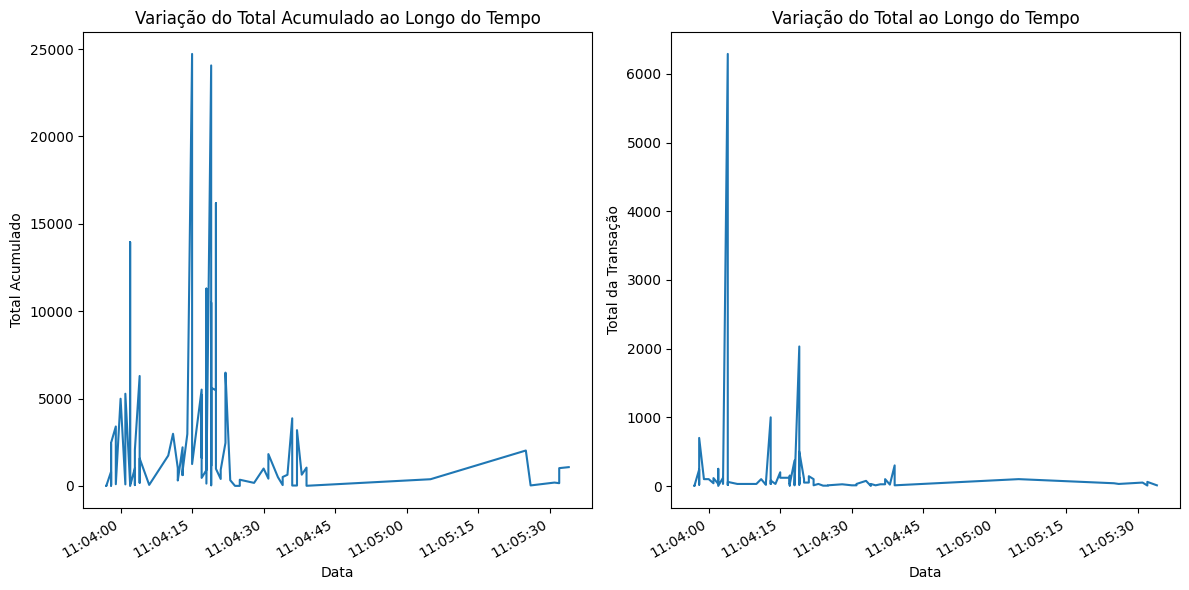

In [38]:
# Configuração da figura
plt.figure(figsize=(12, 6))

# Configuração do primeiro gráfico
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeiro gráfico
df.set_index('transaction.referenceDate', inplace=True)
df['accumulation.month'].plot(title='Variação do limite mensal acumulado ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Total Acumulado')

# Configuração do segundo gráfico
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, segundo gráfico
#df.set_index('transaction.referenceDate', inplace=True)
df['transaction.amount'].plot(title='Variação do Total ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Total da Transação')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()

# Análise 3: Análise de Regras dos workflows
## Contagem de sucesso/falha das regras

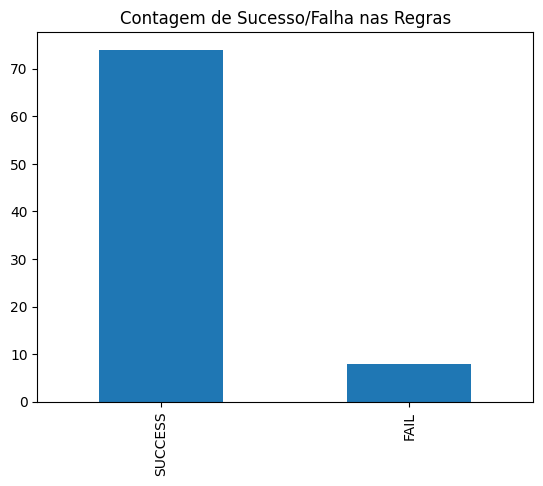

In [39]:
df['validationStatus'].value_counts().plot(kind='bar', title='Contagem de Sucesso/Falha nas Regras')
plt.show()

## Contagem de transações por provedor

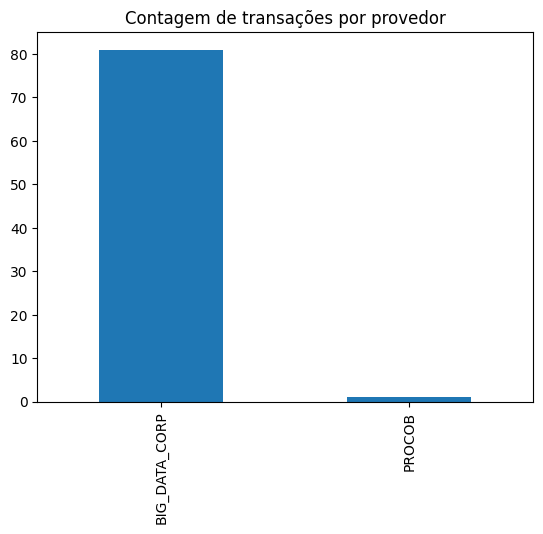

In [41]:
df['bureau.provider'].value_counts().plot(kind='bar', title='Contagem de transações por provedor')
plt.show()

## Contagem de maior/menor de idade

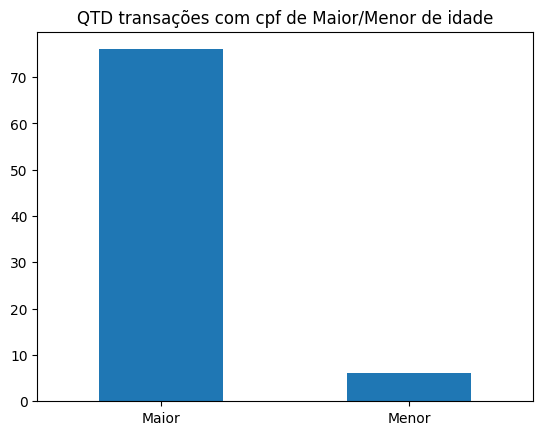

In [42]:
counts = df['bureau.isMinor'].value_counts()
ax = counts.plot(kind='bar', title='QTD transações com cpf de Maior/Menor de idade')
ax.set_xticklabels(['Maior', 'Menor'], rotation=0)
plt.show()

## Contagem de transações por sexo

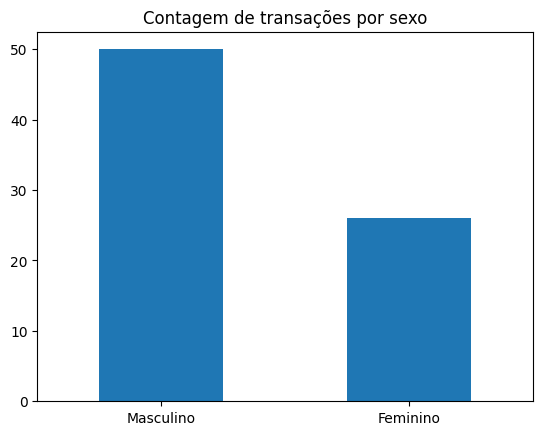

In [45]:
counts = df['bureau.gender'].value_counts()
ax = counts.plot(kind='bar', title='Contagem de transações por sexo')
ax.set_xticklabels(['Masculino', 'Feminino'], rotation=0)
plt.show()

## Contagem de Transações por Tipo de Operação

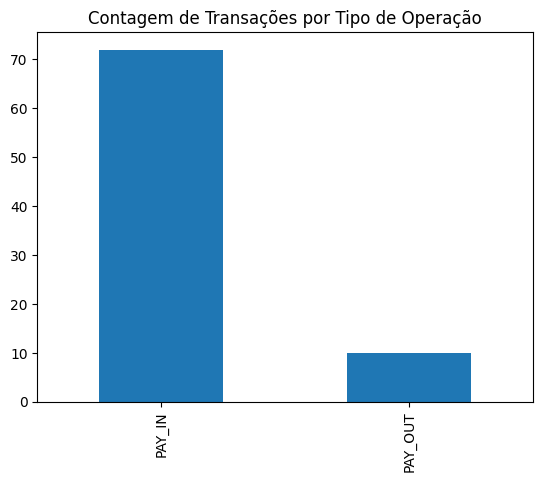

In [46]:
df['transaction.operationType'].value_counts().plot(kind='bar', title='Contagem de Transações por Tipo de Operação')
plt.show()

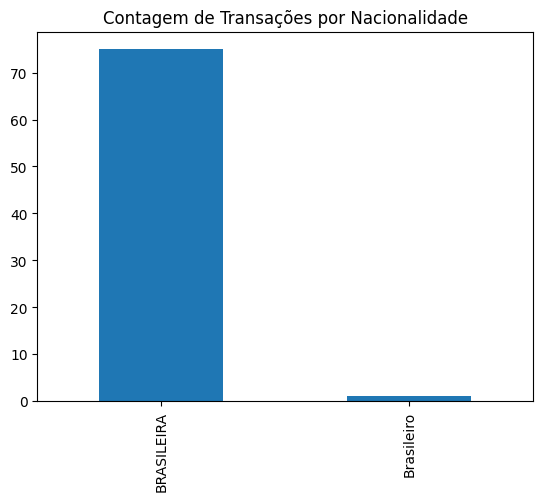

In [48]:
df['bureau.nationality'].value_counts().plot(kind='bar', title='Contagem de Transações por Nacionalidade')
plt.show()

# Análise 4: Correlação entre Variáveis Numéricas

<ipython-input-50-3d82533a0643>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_filtered.corr()


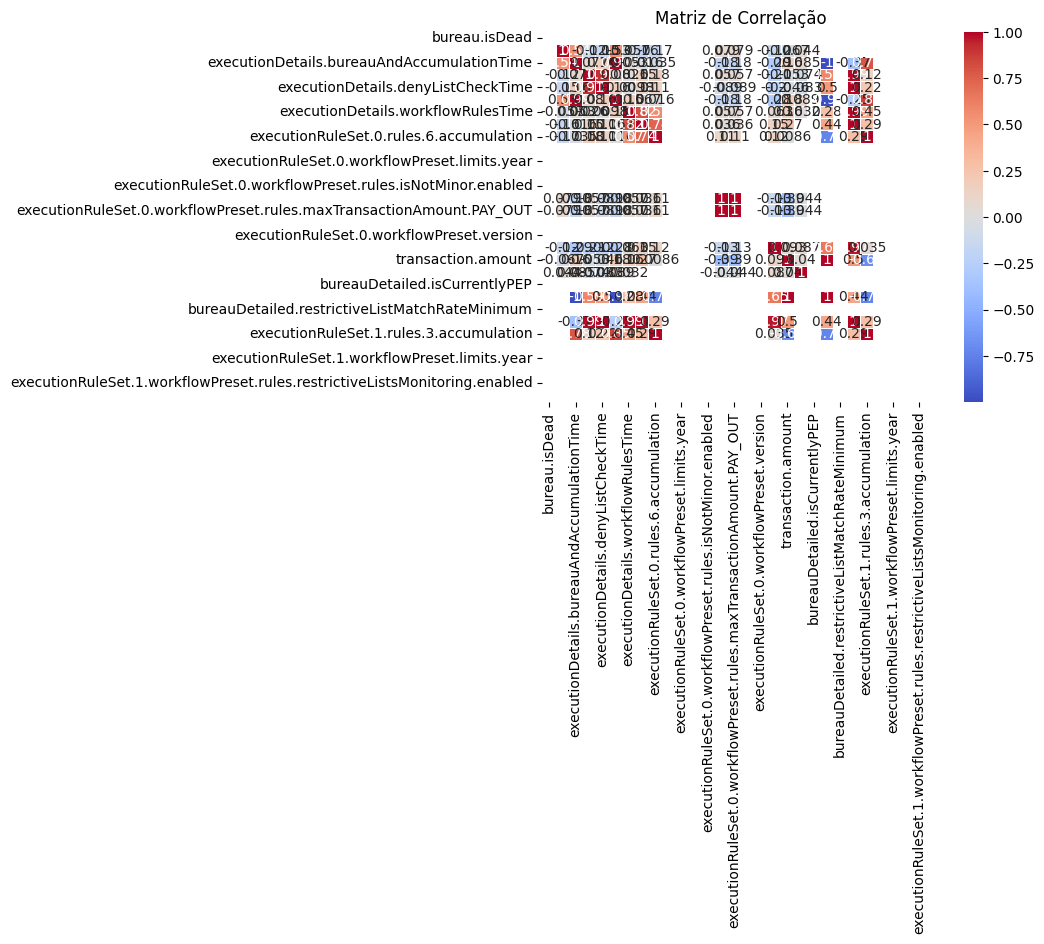

In [50]:
df_filtered = df.drop(['accumulation.day', 'accumulation.month', 'accumulation.monthWeek', 'accumulation.reserve', 'accumulation.total', 'accumulation.year', 'bureau.nameReliability'], axis=1)
corr_matrix = df_filtered.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

# Análise 5: Tabela Resumida

In [51]:
summary_table = pd.DataFrame({
    'Quantidade de Operações': df.shape[0],
    'Média do Tempo de Execução': df['executionDetails.time'].mean(),
    'Moda do Tempo de Execução': df['executionDetails.time'].mode(),
    'Mediana do Tempo de Execução': df['executionDetails.time'].median(),
    'Media Valor da Transação': df['transaction.amount'].mean(),
    'Mediana Valor da Transação': df['transaction.amount'].median(),
    'Máximo Valor da Transação': df['transaction.amount'].max(),
    'Mínimo Valor da Transação': df['transaction.amount'].min(),
})
print(summary_table)

   Quantidade de Operações  Média do Tempo de Execução  \
0                       82                   111.95122   

   Moda do Tempo de Execução  Mediana do Tempo de Execução  \
0                         53                          77.0   

   Media Valor da Transação  Mediana Valor da Transação  \
0                184.947317                        35.0   

   Máximo Valor da Transação  Mínimo Valor da Transação  
0                     6292.0                        1.0  


In [55]:
df_filtered = df.drop(['accumulation.day', 'accumulation.month', 'accumulation.monthWeek', 'accumulation.reserve', 'accumulation.total', 'accumulation.year', 'bureau.nameReliability'], axis=1)
df_filtered.describe()

,bureau.isDead,executionDetails.bureauAndAccumulationTime,executionDetails.denyAllowListTime,executionDetails.denyListCheckTime,executionDetails.time,executionDetails.workflowRulesTime,executionRuleSet.0.rules.5.accumulation,executionRuleSet.0.rules.6.accumulation,executionRuleSet.0.workflowPreset.limits.month,executionRuleSet.0.workflowPreset.limits.year,...,bureauDetailed.isCurrentlyPEP,bureauDetailed.isCurrentlySanctioned,bureauDetailed.restrictiveListMatchRateMinimum,executionRuleSet.1.rules.2.accumulation,executionRuleSet.1.rules.3.accumulation,executionRuleSet.1.workflowPreset.limits.month,executionRuleSet.1.workflowPreset.limits.year,executionRuleSet.1.workflowPreset.rules.PEPMonitoring.enabled,executionRuleSet.1.workflowPreset.rules.restrictiveListsMonitoring.enabled,executionRuleSet.1.workflowPreset.version
count,76.0,82.000000,82.000000,82.000000,82.000000,82.000000,80.000000,80.000000,82.0,82.0,...,3.0,3.000000,3.0,3.000000,3.000000,3.0,3.0,3.0,3.0,3.0
mean,0.0,108.878049,18.292683,6.158537,111.951220,2.646341,2593.662750,12044.690375,15000.0,225000.0,...,0.0,0.333333,85.0,21653.260000,69280.106667,250000.0,1700000.0,1.0,1.0,4.0
std,0.0,92.034131,4.736222,1.606080,92.920503,8.185160,4682.053233,20380.184958,0.0,0.0,...,0.0,0.577350,0.0,4753.304316,52729.739976,0.0,0.0,0.0,0.0,0.0
min,0.0,44.000000,13.000000,4.000000,45.000000,1.000000,1.500000,1.700000,15000.0,225000.0,...,0.0,0.000000,85.0,16177.780000,24536.320000,250000.0,1700000.0,1.0,1.0,4.0
25%,0.0,62.000000,14.000000,5.000000,63.000000,1.000000,171.750000,382.500000,15000.0,225000.0,...,0.0,0.000000,85.0,20119.890000,40213.160000,250000.0,1700000.0,1.0,1.0,4.0
50%,0.0,76.000000,20.000000,7.000000,77.000000,1.000000,915.645000,4031.500000,15000.0,225000.0,...,0.0,0.000000,85.0,24062.000000,55890.000000,250000.0,1700000.0,1.0,1.0,4.0
75%,0.0,105.750000,21.000000,7.000000,108.500000,1.000000,2595.160000,13854.250000,15000.0,225000.0,...,0.0,0.500000,85.0,24391.000000,91652.000000,250000.0,1700000.0,1.0,1.0,4.0
max,0.0,495.000000,37.000000,15.000000,497.000000,46.000000,24720.000000,127414.000000,15000.0,225000.0,...,0.0,1.000000,85.0,24720.000000,127414.000000,250000.0,1700000.0,1.0,1.0,4.0
